# **CASE STUDY - 1**

# **DATA PREPROCESSING**

# **LOAN PREDICTION**

## **Description:-**

The Loan Prediction dataset is a dataset designed to examine the factors that influencing the loan prediction. The datset consists of 614, with each record containing information about various applicant characteristics, financial details, and the loan status (approved or not approved).

## **Feature Variables:-**

* Gender: Gender of the applicant (Male / Female).
* Married: Marital status of the applicant (Yes / No).
* Dependents: Number of dependents the applicant has (0, 1, 2, 3+).
* Education: Education level of the applicant (Graduate / Not Graduate).
* Self_Employed: Whether the applicant is self-employed (Yes / No).
* ApplicantIncome: Income of the applicant.
* CoapplicantIncome: Income of the co-applicant.
* LoanAmount: Loan amount (in thousands).
* Loan_Amount_Term: Term of the loan (in months).
* Credit_History: Credit history of the applicant (1 = good credit, 0 = bad credit).
* Property_Area: The type of area where the applicant resides (Urban / Semiurban / Rural).

## **Target Varible:-**

* Loan_Status: The loan approval status (Y = Approved, N = Not Approved).


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/AI_ML_ICT/NOTES/Codes/Data/train_loan.csv'

# **1. Import All Necessary Libraries**

In [3]:
import pandas as pd               # For data handling and manipulation
import numpy as np                # For numerical operations
import matplotlib.pyplot as plt   # For creating visualizations
import seaborn as sns             # For advanced visualizations

# **2. Load the Dataset**

In [4]:
# Read the dataset from csv file into a pandas DataFrame
# The CSV file contains the loan prediction data with customer details and loan status
df_loan = pd.read_csv(path)

# Displaying the first 5 columns to get the overview of the dataset
print('First 5 rows of the dataset:')
df_loan.head(5)

First 5 rows of the dataset:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **3. Data Exploration**

In [5]:
# Check the shape of the dataset( number of rows and columns)
print('Dataset shape (rows, columns):',df_loan.shape)

Dataset shape (rows, columns): (614, 13)


In [6]:
# Get the summary information about the dataset
print('Dataset Information:')
df_loan.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Display the basis statistical summary for numerical columns
print('Statistical Summary of Numerical Columns:')
df_loan.describe()

Statistical Summary of Numerical Columns:


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# **4. Data Preprocessing**

## **1. Identify & Remove Unnecessary Columns**

In [8]:
# Drop identifier column (Loan_ID) - It doesn't help in prediction
df_loan.drop(columns=['Loan_ID'], inplace=True)


In [9]:
# Verify shape after dropping the columns
print('Shape after droppinf Loan_ID column:',df_loan.shape)

Shape after droppinf Loan_ID column: (614, 12)


In [10]:
# Display remaining columns
print('Remaining columns in the dataset:')
df_loan.columns.tolist()

Remaining columns in the dataset:


['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

## **2. Identify & Remove Duplicates**

In [11]:
# Check for duplicate rows in the dataset
df_loan.duplicated().sum()

np.int64(0)

## **3. Identify Missing Values / Null Values**

In [12]:
# Check the dataset for missing (null) values in each column
df_loan.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


## **4. Handling Missing Values**

### **4.1. Check Percentage of Missing Values**

In [13]:
# Checking percentage of missing values in each column
round(df_loan.isnull().mean()*100,2)

,0
Gender,2.12
Married,0.49
Dependents,2.44
Education,0.00
Self_Employed,5.21
ApplicantIncome,0.00
CoapplicantIncome,0.00
LoanAmount,3.58
Loan_Amount_Term,2.28
Credit_History,8.14


### **4.2. Handling Missing Values using SimpleImputer**

In [14]:
# Importing SimpleImputer for missing value imputation
from sklearn.impute import SimpleImputer

# Looping through each column and applying imputation
for col in df_loan.columns:
    # If column is numerical -> use Median strategy
    if df_loan[col].dtype in ['float64', 'int64']:
        imputer = SimpleImputer(strategy='median')
    # If column is categorical -> use Most Frequent (Mode) strategy
    else:
        imputer = SimpleImputer(strategy='most_frequent')

    # Apply the imputer and transform the column
    df_loan[[col]] = imputer.fit_transform(df_loan[[col]])

# Displaying dataset after imputation
print("Dataset after replacing missing values:")
df_loan.head(5)

Dataset after replacing missing values:


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


### **4.3. Verify Missing values After Imputation**

In [15]:
# Checking missing values again after handling
round(df_loan.isnull().mean()*100, 2)

,0
Gender,0.0
Married,0.0
Dependents,0.0
Education,0.0
Self_Employed,0.0
ApplicantIncome,0.0
CoapplicantIncome,0.0
LoanAmount,0.0
Loan_Amount_Term,0.0
Credit_History,0.0


## **5. Outlier Detection**

### **5.1. Outlier Detection using Boxplot (All Numerical Columns)**

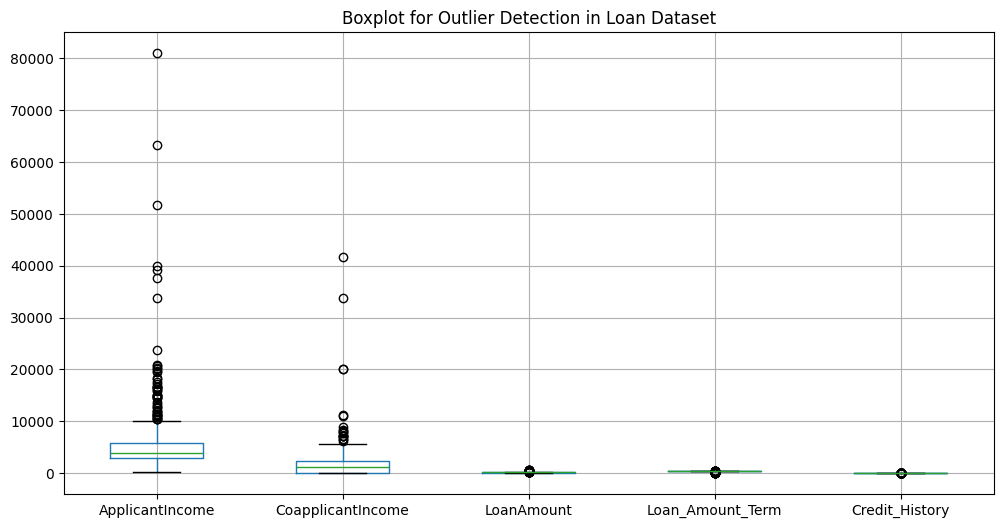

In [16]:
# Drawing boxplot for all numerical columns in the dataset
df_loan.boxplot(figsize=(12,6))

# Adding a title to clearly specify the purpose of the plot
plt.title("Boxplot for Outlier Detection in Loan Dataset")

# Displaying the boxplot
plt.show()

**Insight:-**

The boxplot reveals the presence of significant outliers in the numerical features of the dataset. ApplicantIncome and CoapplicantIncome show extreme values, indicating that a few applicants have disproportionately higher incomes compared to the majority. LoanAmount also displays some noticeable outliers, while Loan_Amount_Term and Credit_History appear comparatively stable. These outliers, if not treated, could bias the model by giving undue weight to rare and extreme cases, hence affecting prediction accuracy.



### **5.2. Checking Skewness of Numerical Columns in the Loan Dataset**

In [17]:
# Selecting only numerical columns and calculation skewness
skewness_values = df_loan.select_dtypes('number').skew()

# Sorting skewness values in descending order to see most skewed features first
skewness_sorted = skewness_values.sort_values(ascending=False)

# Displaying skewness values of numerical feature
print("Skewness of Numerical Columns:\n")
skewness_sorted

Skewness of Numerical Columns:



,0
CoapplicantIncome,7.491531
ApplicantIncome,6.539513
LoanAmount,2.743053
Credit_History,-2.021971
Loan_Amount_Term,-2.402112


In [18]:
# Selecting only the numerical columns from the dataset
numerical_cols = df_loan.select_dtypes('number').columns

# Display the list of numerical column names
numerical_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

### **5.3. IQR Method (Inter Quartile Range)**

In [28]:
# Function to Remove Outliers using IQR Method
def remove_outliers(df, column):
    # Create a copy of the dataframe to avoid modifying the original
    df_filtered = df

    # Loop through each column provided
    for col in column:
        # Calculate 1st Quartile (Q1) and 3rd Quartile (Q3)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Calculate Inter Quartile Range (IQR)
        IQR = Q3 - Q1

        # Define lower and upper limits for outliers
        lower_limit = Q1 - (1.5 * IQR)
        upper_limit = Q3 + (1.5 * IQR)

        # Filter out rows that fall outside the limits (remove outliers)
        df_filtered = df_filtered[(df_filtered[col] >= lower_limit) & (df_filtered[col] <= upper_limit)]

    # Return the cleaned dataframe without outliers
    return df_filtered

In [29]:
# Apply the IQR-based outlier removal on numerical columns
df_loan = remove_outliers(df_loan, numerical_cols)

# Display the cleaned dataframe
df_loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
603,Male,No,0,Graduate,No,3676.0,4301.0,172.0,360.0,1.0,Rural,Y
606,Male,Yes,1,Graduate,No,3400.0,2500.0,173.0,360.0,1.0,Semiurban,Y
607,Male,Yes,2,Not Graduate,No,3987.0,1411.0,157.0,360.0,1.0,Rural,Y
608,Male,Yes,0,Graduate,No,3232.0,1950.0,108.0,360.0,1.0,Rural,Y


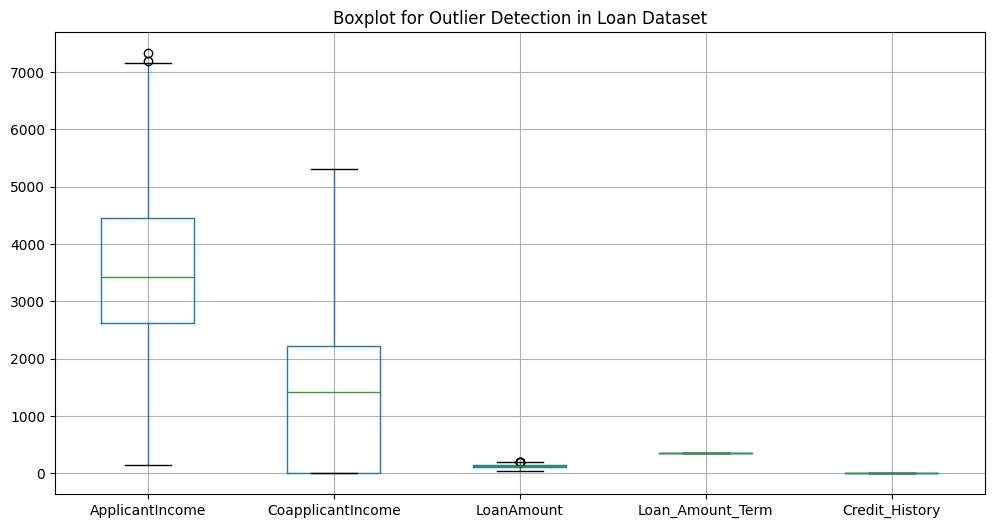

In [30]:
# Drawing boxplot for all numerical columns in the dataset
df_loan.boxplot(figsize=(12,6))

# Adding a title to clearly specify the purpose of the plot
plt.title("Boxplot for Outlier Detection in Loan Dataset")

# Displaying the boxplot
plt.show()

**Insight:-**

After applying outlier treatment, the boxplot shows a much more balanced distribution of numerical features. The extreme values in ApplicantIncome, CoapplicantIncome, and LoanAmount have been significantly reduced, resulting in cleaner and more consistent data. Loan_Amount_Term and Credit_History remain relatively stable with minimal variation. This reduction in outliers ensures that the dataset is less skewed, thereby improving the reliability of the model and reducing the risk of biased predictions caused by extreme data points.

In [31]:
# Checking skewness after removing outliers
df_loan.select_dtypes('number').skew()


,0
ApplicantIncome,0.518459
CoapplicantIncome,0.650764
LoanAmount,0.025003
Loan_Amount_Term,0.000000
Credit_History,0.000000


# **4. Data Manipulation**

In [34]:
# Display the basis statistical summary for numerical columns after oulier removal
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,346.000000,346.000000,346.000000,346.0,346.0
mean,3651.046243,1345.757572,120.569364,360.0,1.0
std,1323.609581,1327.931027,34.115271,0.0,0.0
min,150.000000,0.000000,44.000000,360.0,1.0
25%,2626.750000,0.000000,99.000000,360.0,1.0
50%,3422.500000,1420.500000,120.000000,360.0,1.0
75%,4454.250000,2219.500000,138.750000,360.0,1.0
max,7333.000000,5302.000000,201.000000,360.0,1.0


In [35]:
# Display the first 3 rows of the dataset
df_loan.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


/tmp/ipython-input-1854598243.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_loan[numerical_cols], kde=True)


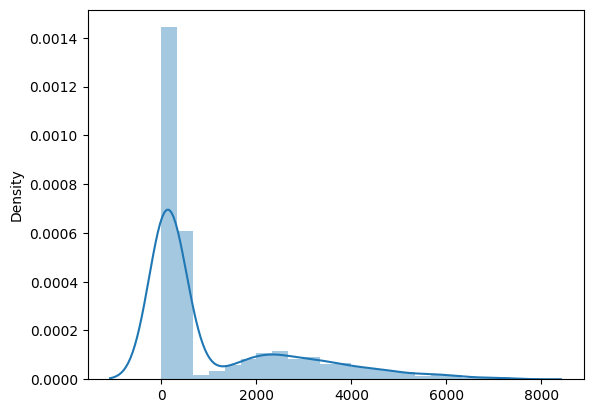

In [37]:
# Plotting the distribution of all numerical columns in the dataset
sns.distplot(df_loan[numerical_cols], kde=True)
plt.show()

## 1. Scaling

In [38]:
# Import MinMaxScaler from sklearn for feature scaling
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler object
sc = MinMaxScaler()

# Apply Min-Max normalization on all numerical columns in df_loan
# This scales values to a fixed range [0, 1]
scale_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
df_loan[scale_cols] = sc.fit_transform(df_loan[scale_cols])

# Display the first 5 rows of the scaled dataframe
df_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.793401,0.000000,0.535032,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,0.617152,0.284421,0.535032,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,0.396770,0.000000,0.140127,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,0.338716,0.444738,0.484076,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,0.814423,0.000000,0.617834,360.0,1.0,Urban,Y


In [39]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,346.000000,346.000000,346.000000,346.0,346.0
mean,0.487407,0.253821,0.487703,360.0,1.0
std,0.184270,0.250459,0.217295,0.0,0.0
min,0.000000,0.000000,0.000000,360.0,1.0
25%,0.344807,0.000000,0.350318,360.0,1.0
50%,0.455590,0.267918,0.484076,360.0,1.0
75%,0.599227,0.418616,0.603503,360.0,1.0
max,1.000000,1.000000,1.000000,360.0,1.0


## **2. Feature Engineering**

In [40]:
# 1. Total Income
# Combine applicant and coapplicant income to capture full household earning power
df_loan['TotalIncome'] = df_loan['ApplicantIncome'] + df_loan['CoapplicantIncome']

# 2. Income to Loan Ratio
# Higher ratio means applicant has more income compared to loan → better repayment ability
df_loan['IncomeLoanRatio'] = df_loan['TotalIncome'] / df_loan['LoanAmount']

# 3. EMI (Equated Monthly Installment)
# Approximate monthly burden: loan amount divided by number of months in term
df_loan['EMI'] = df_loan['LoanAmount'] / df_loan['Loan_Amount_Term']

# 4. Balance Income
# Income left after paying EMI → important for affordability check
# (LoanAmount is often recorded in thousands, so we multiply EMI by 1000 to match scale)
df_loan['BalanceIncome'] = df_loan['TotalIncome'] - (df_loan['EMI'] * 1000)

# 5. Dependents (Convert '3+' into numeric)
# Dependents is treated as numeric rather than string
df_loan['Dependents'] = df_loan['Dependents'].replace('3+', 3).astype(int)


# Displaying the first 3 rows of the loan dataset
df_loan.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,IncomeLoanRatio,EMI,BalanceIncome
0,Male,No,0,Graduate,No,0.793401,0.000000,0.535032,360.0,1.0,Urban,Y,0.793401,1.482904,0.001486,-0.692798
1,Male,Yes,1,Graduate,No,0.617152,0.284421,0.535032,360.0,1.0,Rural,N,0.901573,1.685082,0.001486,-0.584627
2,Male,Yes,0,Graduate,Yes,0.396770,0.000000,0.140127,360.0,1.0,Urban,Y,0.396770,2.831496,0.000389,0.007527


## **3. Encoding**

### **3.1. Label Encoding**

In [41]:
# Import LabelEncoder for converting categorical → numerical
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object (can be reused for multiple columns)
label = LabelEncoder()

# Convert categorical (string) values into numeric (0/1 for binary or 0,1,2... for multi-class)
df_loan['Gender'] = label.fit_transform(df_loan['Gender'])         # Example: Male=1, Female=0
df_loan['Married'] = label.fit_transform(df_loan['Married'])       # Example: Yes=1, No=0
df_loan['Education'] = label.fit_transform(df_loan['Education'])   # Example: Graduate=0, Not Graduate=1
df_loan['Self_Employed'] = label.fit_transform(df_loan['Self_Employed'])  # Example: No=0, Yes=1

# Displaying the dataset
df_loan.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,IncomeLoanRatio,EMI,BalanceIncome
0,1,0,0,0,0,0.793401,0.000000,0.535032,360.0,1.0,Urban,Y,0.793401,1.482904,0.001486,-0.692798
1,1,1,1,0,0,0.617152,0.284421,0.535032,360.0,1.0,Rural,N,0.901573,1.685082,0.001486,-0.584627
2,1,1,0,0,1,0.396770,0.000000,0.140127,360.0,1.0,Urban,Y,0.396770,2.831496,0.000389,0.007527
3,1,1,0,1,0,0.338716,0.444738,0.484076,360.0,1.0,Urban,Y,0.783454,1.618452,0.001345,-0.561203
4,1,0,0,0,0,0.814423,0.000000,0.617834,360.0,1.0,Urban,Y,0.814423,1.318190,0.001716,-0.901784


### **2. OneHot Encoding**

In [42]:
# One-Hot Encoding for Property_Area (multi-class feature)
df_loan = pd.get_dummies(df_loan, columns=['Property_Area'], drop_first=True, dtype=int)

# Check first 3 rows
df_loan.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,IncomeLoanRatio,EMI,BalanceIncome,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0.793401,0.000000,0.535032,360.0,1.0,Y,0.793401,1.482904,0.001486,-0.692798,0,1
1,1,1,1,0,0,0.617152,0.284421,0.535032,360.0,1.0,N,0.901573,1.685082,0.001486,-0.584627,0,0
2,1,1,0,0,1,0.396770,0.000000,0.140127,360.0,1.0,Y,0.396770,2.831496,0.000389,0.007527,0,1


### **3. Target Column Encoding**

In [43]:
# Encoding the target column 'Loan_Status' using Label Encoding.
# The column originally contains categorical values 'Y' and 'N'.
df_loan['Loan_Status'] = label.fit_transform(df_loan['Loan_Status'])

# Checking the first 3 rows
df_loan.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,IncomeLoanRatio,EMI,BalanceIncome,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0.793401,0.000000,0.535032,360.0,1.0,1,0.793401,1.482904,0.001486,-0.692798,0,1
1,1,1,1,0,0,0.617152,0.284421,0.535032,360.0,1.0,0,0.901573,1.685082,0.001486,-0.584627,0,0
2,1,1,0,0,1,0.396770,0.000000,0.140127,360.0,1.0,1,0.396770,2.831496,0.000389,0.007527,0,1


In [44]:
# Checking all the columns having numbers
df_loan.dtypes

,0
Gender,int64
Married,int64
Dependents,int64
Education,int64
Self_Employed,int64
ApplicantIncome,float64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64
